# Introduction

As an AirBnB host, if we try to charge above market price for a living space we'd like to rent, then renters will select more affordable alternatives which are similar to ours.. If we set our nightly rent price too low, we'll miss out on potential revenue.

One strategy we could use is to:

* find a few listings that are similar to ours,
* average the listed price for the ones most similar to ours,
* set our listing price to this calculated average price.

The process of discovering patterns in existing data to make a prediction is called **machine learning**. In our case, we want to use data on local listings to predict the optimal price for us to set. In this mission, we'll explore a specific machine learning technique called **k-nearest neighbors**, which mirrors the strategy we just described. Before we dive further into machine learning and k-nearest neighbors, let's get familiar with the dataset we'll be working with.

# Dataset

While AirBnB doesn't release any data on the listings in their marketplace, a separate group named Inside AirBnB has extracted data on a sample of the listings for many of the major cities on the website. In this post, we'll be working with their dataset from October 3, 2015 on the listings from Washington, D.C., the capital of the United States. Here's a direct link to that dataset. Each row in the dataset is a specific listing that's available for renting on AirBnB in the Washington, D.C. area

To make the dataset less cumbersome to work with, we've removed many of the columns in the original dataset and renamed the file to dc_airbnb.csv. Kept columns:  
* host_response_rate: the response rate of the host
* host_acceptance_rate: number of requests to the host that convert to rentals
* host_listings_count: number of other listings the host has
* latitude: latitude dimension of the geographic coordinates
* longitude: longitude part of the coordinates
* city: the city the living space resides
* zipcode: the zip code the living space resides
* state: the state the living space resides
* accommodates: the number of guests the rental can accommodate
* room_type: the type of living space (Private room, Shared room or Entire home/apt
* bedrooms: number of bedrooms included in the rental
* bathrooms: number of bathrooms included in the rental
* beds: number of beds included in the rental
* price: nightly price for the rental
* cleaning_fee: additional fee used for cleaning the living space after the guest leaves
* security_deposit: refundable security deposit, in case of damages
* minimum_nights: minimum number of nights a guest can stay for the rental
* maximum_nights: maximum number of nights a guest can stay for the rental
* number_of_reviews: number of reviews that previous guests have left



In [4]:
import pandas as pd

dc_listings = pd.read_csv("dc_airbnb.csv")
print(dc_listings)

     host_response_rate host_acceptance_rate  host_listings_count  \
0                   92%                  91%                   26   
1                   90%                 100%                    1   
2                   90%                 100%                    2   
3                  100%                  NaN                    1   
4                   92%                  67%                    1   
5                  100%                 100%                    1   
6                  100%                  NaN                    1   
7                  100%                  NaN                    1   
8                   94%                  99%                    8   
9                  100%                 100%                    9   
10                 100%                 100%                    1   
11                  88%                 100%                    1   
12                  NaN                  NaN                    1   
13                  68%           

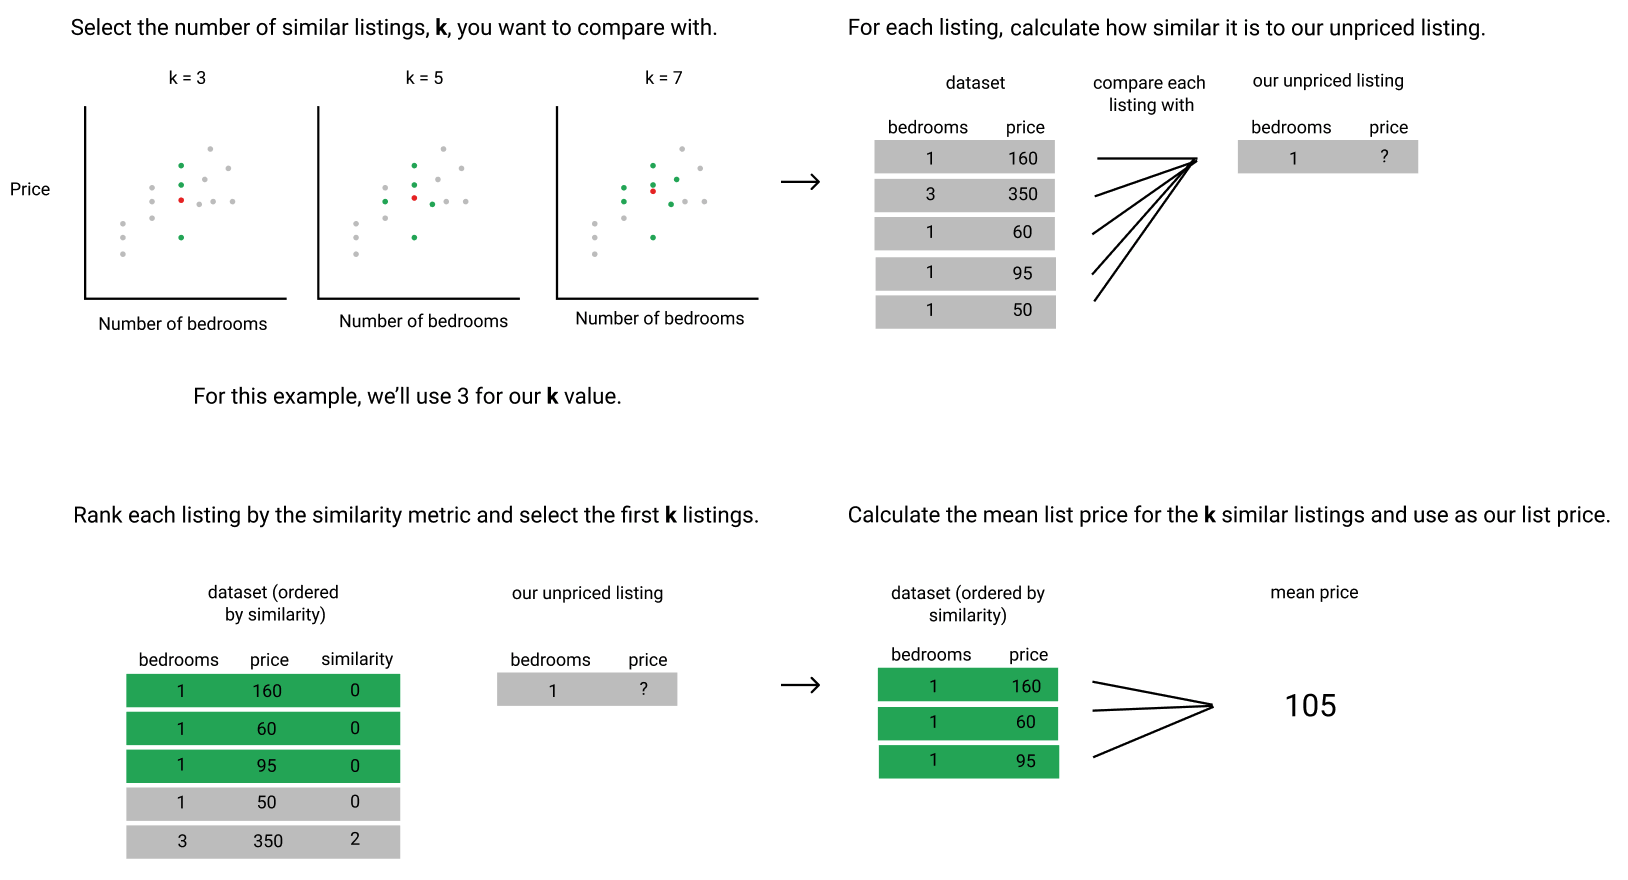

There are 2 things we need to unpack in more detail:

* the **similarity metric**
* how to choose the **k value**



## Similarity metric / euclidean distance

The similarity metric works by comparing a **fixed set of numerical features**, another word for attributes, between 2 observations, or living spaces in our case. When trying to predict a continuous value, like price, the main similarity metric that's used is Euclidean distance. Here's the general formula for Euclidean distance:




In [9]:
%%latex
\begin{align}
\sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2}
\end{align}

<IPython.core.display.Latex object>

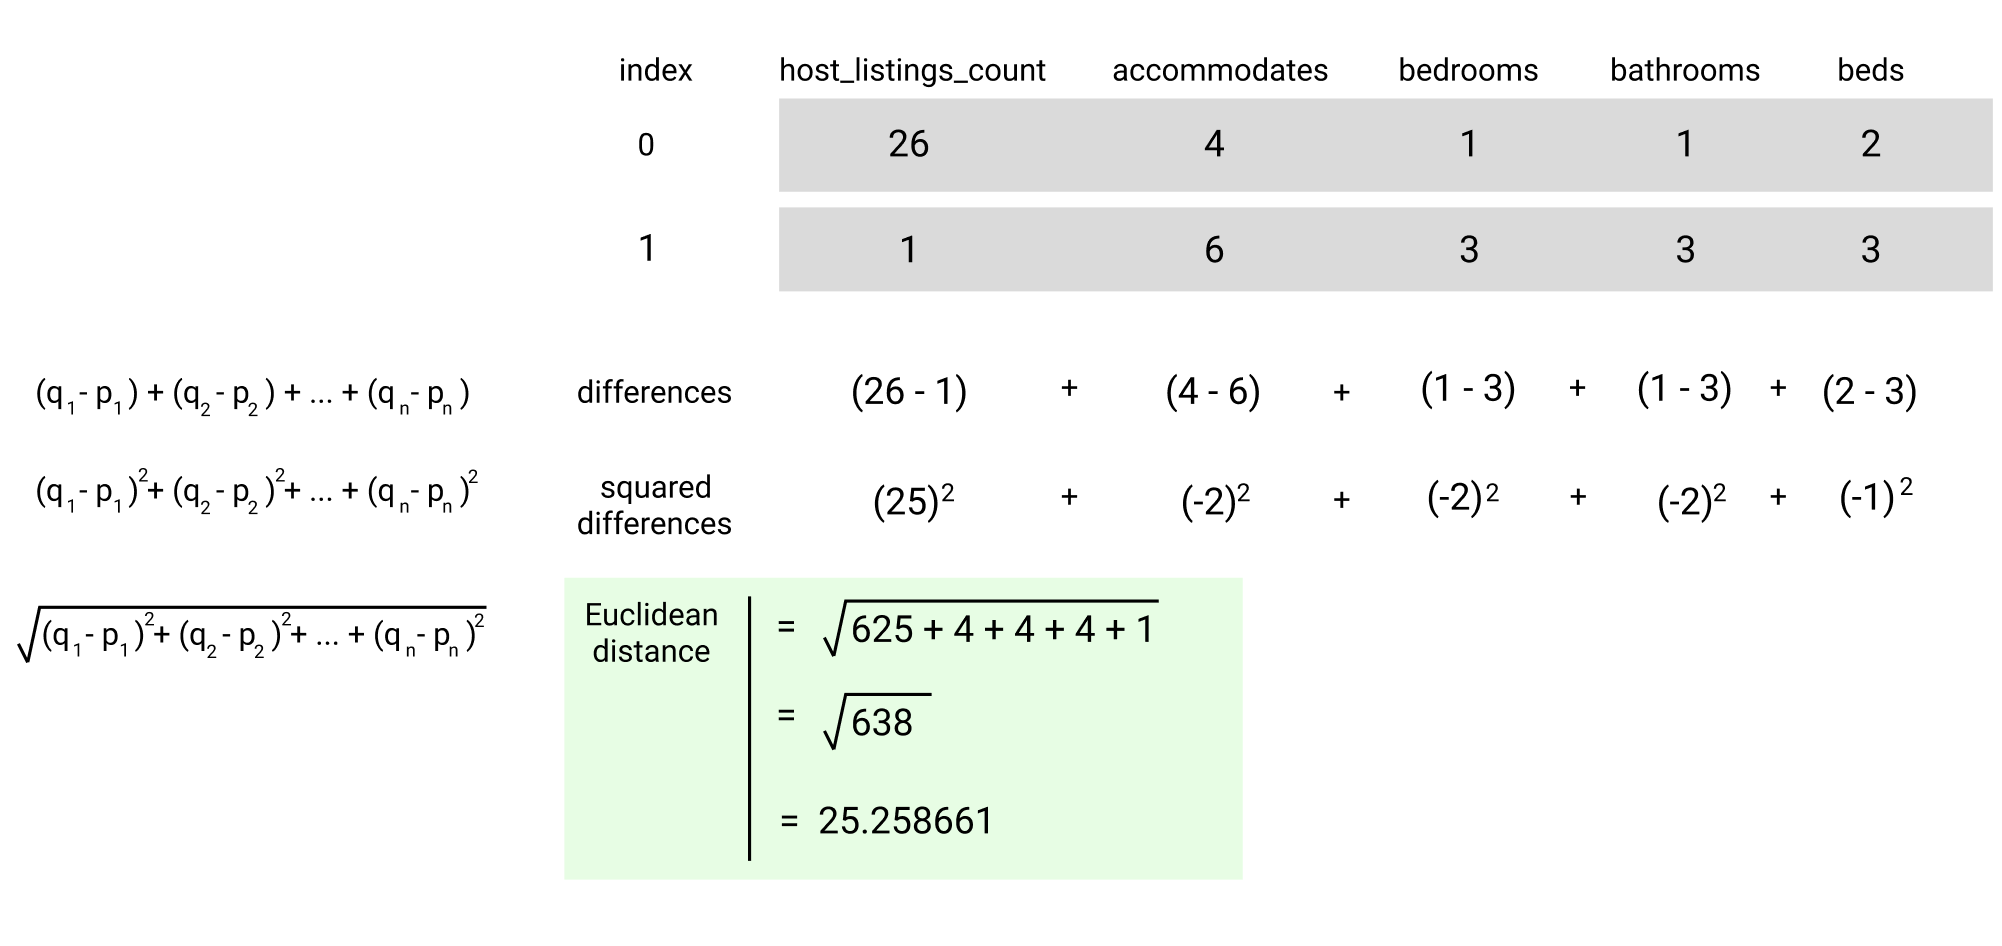

In this mission, we'll use just one feature in this mission to keep things simple as you become familiar with the machine learning workflow. Since we're only using one feature, this is known as the univariate case. Here's how the formula looks like for the **univariate case**

In [15]:
%%latex
\begin{align}
\sqrt{(q_1 - p_1)^2} = | q_1 - p_1 |
\end{align}

<IPython.core.display.Latex object>

### Example

Calculate the Euclidean distance between our living space, which can accommodate 3 people, and the first living space in the dc_listings Dataframe.


In [30]:
import numpy as np


our_listing_acc = 3

first_appt_acc = dc_listings.iloc[0]["accommodates"]
first_distance = np.absolute(first_appt_acc - our_listing_acc)
print(first_distance)

1


In [36]:
# Calculating distance for all datapoints

dc_listings['distance'] = dc_listings['accommodates'].apply(lambda x: np.absolute(x - our_listing_acc ))                
print(dc_listings['distance'].value_counts())
print(dc_listings[:5])

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: distance, dtype: int64
  host_response_rate host_acceptance_rate  host_listings_count  accommodates  \
0                92%                  91%                   26             4   
1                90%                 100%                    1             6   
2                90%                 100%                    2             1   
3               100%                  NaN                    1             2   
4                92%                  67%                    1             4   

         room_type  bedrooms  bathrooms  beds    price cleaning_fee  \
0  Entire home/apt       1.0        1.0   2.0  $160.00      $115.00   
1  Entire home/apt       3.0        3.0   3.0  $350.00      $100.00   
2     Private room       1.0        2.0   1.0   $50.00          NaN   
3     Private room       1.0        1.0   1.0   $95.